# 06. Introduction to CNN 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


## 1. Test Data

(1, 3, 3, 1)


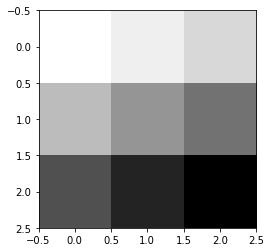

In [2]:
image = tf.constant([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.numpy().reshape(3,3), cmap='Greys')
plt.show()

## 2. 가중치

### tf.constant_initializer
- 상수 값으로 텐서를 생성하는 이니셜 라이저

In [3]:
value = [0, 1, 2, 3, 4, 5, 6, 7]
init = tf.constant_initializer(value)

init(shape=[2, 4], dtype=tf.float32)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[0., 1., 2., 3.],
       [4., 5., 6., 7.]], dtype=float32)>

In [4]:
# 더 큰 모양
init(shape=[3, 4], dtype=tf.float32)     #  -->  value list 원소 갯수가 맞지 않아 TypeError 발생

# 더 작은 모양
# init(shape=[2, 3], dtype=tf.float32)      -->  TypeError

TypeError: Eager execution of tf.constant with unsupported shape (value has 8 elements, shape is (3, 4) with 12 elements).

- 가중치 초기화

In [5]:
weight = np.array([[[[1.]],[[1.]]],
                   [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)

weight_init = tf.constant_initializer(weight)

weight.shape (2, 2, 1, 1)


## 3. Simple Convolution Layer
- filter 1개 사용

### 3-1. Padding Valid

conv2d.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


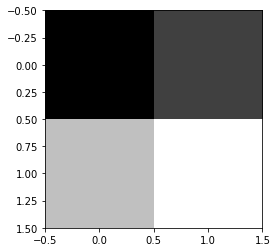

In [6]:
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='VALID', 
                             kernel_initializer=weight_init)(image)

print("conv2d.shape", conv2d.shape)

print(conv2d.numpy().reshape(2,2))
plt.imshow(conv2d.numpy().reshape(2,2), cmap='gray')
plt.show()

### 3-2. Padding Same

conv2d.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


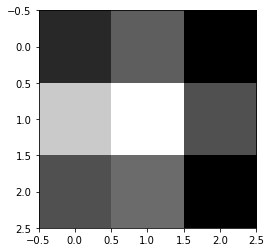

In [7]:
conv2d = keras.layers.Conv2D(filters=1, kernel_size=2, padding='SAME', 
                             kernel_initializer=weight_init)(image)

print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

## 4. filter 3개 사용 CNN

In [8]:
weight = np.array([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                   [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)

weight_init = tf.constant_initializer(weight)

weight.shape (2, 2, 1, 3)


In [9]:
conv2d = keras.layers.Conv2D(filters=3, kernel_size=2, padding='SAME',
                             kernel_initializer=weight_init)(image)

print("conv2d.shape", conv2d.shape)

conv2d.shape (1, 3, 3, 3)


In [10]:
# 차원 축 변경
np.swapaxes(conv2d, 0, 3).shape

(3, 3, 3, 1)

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


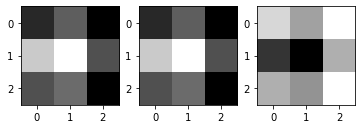

In [11]:
# 이미지를 그리기 위한 차원 축 변경
feature_maps = np.swapaxes(conv2d, 0, 3)

for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3), cmap='gray')
plt.show()

## 5. Pooling

### 5-1. Max Pooling : padding valid

In [12]:
image = tf.constant([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)

pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='VALID')(image)

print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


### 5-2. Max Pooling : padding same

In [13]:
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='SAME')(image)

print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## 6. Example : MNIST Image

In [14]:
mnist = keras.datasets.mnist
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

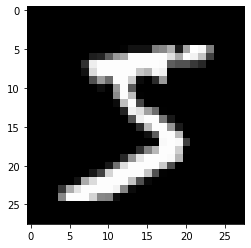

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

img = train_images[0]
plt.imshow(img, cmap='gray')
plt.show()

In [16]:
img0 = img.reshape(-1,28,28,1)
img0 = tf.convert_to_tensor(img0)

In [17]:
weight_init = keras.initializers.RandomNormal(stddev=0.01)

conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, strides=(2, 2), padding='SAME', 
                             kernel_initializer=weight_init)(img0)

print(conv2d.shape)

(1, 14, 14, 5)


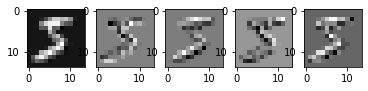

In [18]:
feature_maps = np.swapaxes(conv2d, 0, 3)

for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 5)


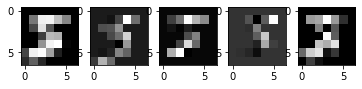

In [19]:
pool = keras.layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding='SAME')(conv2d)
print(pool.shape)

feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7, 7), cmap='gray')
plt.show()

- Reference 
 * https://github.com/deeplearningzerotoall/TensorFlow/blob/master/tf_2.x/lab-11-0-cnn-basics-keras-eager.ipynb